<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Spring 2022</h5>

---

# Problem Set 04
<h4 align="center">Vahid Pourakbar     400205511</h4>


In [1]:
%reset -f
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Question 3

In [2]:
X = np.array([-2, -1, -1, -1, 0, 1, 2, 2]).reshape(-1, 1)
y = np.array([35, 40, 36, 38, 40, 43, 45, 43])

print('\tLasso X, y')
model = linear_model.LinearRegression().fit(X, y)
print('𝜆 = {:3}:\ty = {} + {}x_1'.format(0, model.intercept_, model.coef_[0]))
for a in [0.1, 1]:
    model = linear_model.Lasso(alpha=a).fit(X, y)
    print('𝜆 = {:3}:\ty = {} + {}x_1'.format(a, model.intercept_, model.coef_[0]))

print('\tLasso X*2, y')
model = linear_model.LinearRegression().fit(X*2, y)
print('𝜆 = {:3}:\ty = {} + {}x_1'.format(0, model.intercept_, model.coef_[0]))
for a in [0.1, 1]:
    model = linear_model.Lasso(alpha=a).fit(X*2, y)
    print('𝜆 = {:3}:\ty = {} + {}x_1'.format(a, model.intercept_, model.coef_[0]))


	Lasso X, y
𝜆 =   0:	y = 40.0 + 2.1875x_1
𝜆 = 0.1:	y = 40.0 + 2.1375x_1
𝜆 =   1:	y = 40.0 + 1.6875x_1
	Lasso X*2, y
𝜆 =   0:	y = 40.0 + 1.09375x_1
𝜆 = 0.1:	y = 40.0 + 1.08125x_1
𝜆 =   1:	y = 40.0 + 0.96875x_1


## Question 4

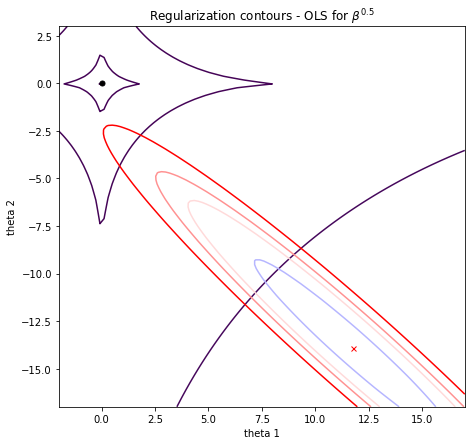

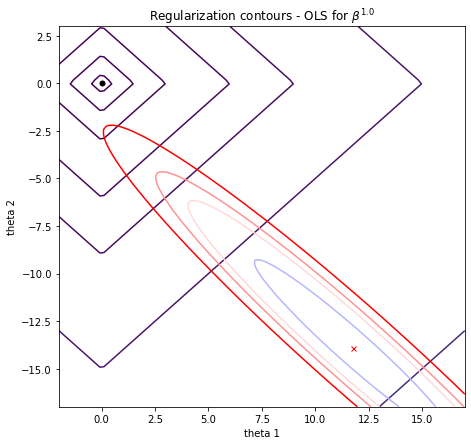

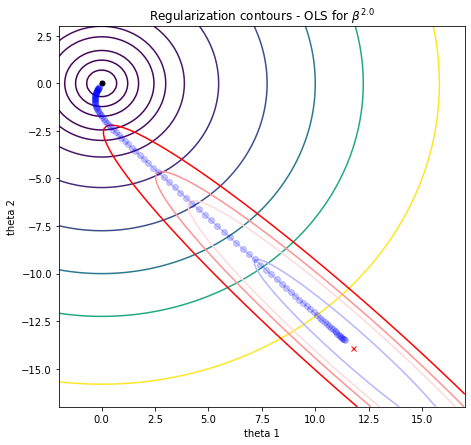

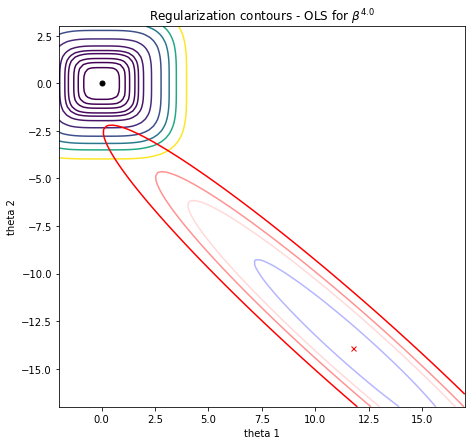

In [3]:
def costfunction(X,y,theta):
    '''OLS cost function'''
    #Initialisation of useful values 
    m = np.size(y)
    
    #Cost function in vectorized form
    h = X @ theta
    return float((1./(2*m)) * (h - y).T @ (h - y));    

def cost(x,y, q):
    return np.power(np.abs(x), q) + np.power(np.abs(y), q)

def closed_form_reg_solution(X,y,lamda = 10): 
    '''Ridge regression closed form solution'''
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0]


def Q4(q):
    #Setup of meshgrid of theta values
    xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

    #Computing the cost function for each theta combination
    zz_l = np.array(  [cost(xi, yi, q)for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )

    zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                        for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

    #Reshaping the cost values 
    Z_l = zz_l.reshape(xx.shape)   
    Z_ls = zz_ls.reshape(xx.shape)

    #Defining the global min of each function
    min_ls = np.linalg.inv(X.T@X)@X.T@y_noise

    #Plotting the contours
    fig = plt.figure(figsize = (16,7))
    ax = fig.add_subplot(1, 2, 1)
    ax.contour(xx, yy, Z_l, levels = [.5,1.5,3,6,9,15,30,60,100,150,250])
    ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'bwr')
    ax.set_xlabel('theta 1'), ax.set_ylabel('theta 2')
    ax.set_title('Regularization contours - OLS for $\\beta^{%.1f}$' %q)

    #Plotting the minimum - L 
    ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 5)
    ax.plot(0,0, marker = 'o', color = 'black', markersize = 5)

    if q == 2:
        #Plotting the path of L2 regularized minimum
        ax.plot(theta_0_list_reg_l2,theta_1_list_reg_l2, marker = 'o', color = 'b', alpha = .2)
    plt.show()


''' __________ dataset __________ '''
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Normalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

# Computing the Ridge regularization solutions as a function of λ - Note we are using the closed form solution
lambda_range = np.logspace(0,4,num = 100)/1000
theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []
for l in lambda_range:
    t0, t1 = closed_form_reg_solution(X,y_noise,l)
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

for q in [.5, 1, 2, 4]:
    Q4(q)

## Question 6

### Part A

In [4]:
def dataset(n=100, k=20):
    n = n
    k = k
    X = np.random.normal(0, 1, (n, k))
    eps = np.random.normal(0, 1, n)
    y = X[:,0] + 2 * X[:,1] + eps
    return X, y

X, y = dataset(n=100, k=20)

### Part B

In [5]:
def linear_regression():
    model = linear_model.LinearRegression().fit(X, y)
    text = ('𝜆 = {:5}:\n b_0 = {}\tb_j = {}\n'.format(0, model.intercept_, model.coef_))
    return text
print(linear_regression())

𝜆 =     0:
 b_0 = 0.07788811975291113	b_j = [ 0.99221982  2.13404833  0.08006252  0.06096869 -0.20807851 -0.17272621
  0.04639124 -0.02321317 -0.0388622   0.06022311  0.17872559 -0.07058848
  0.002442    0.23747097 -0.14697323  0.0886012   0.01642228  0.05333901
 -0.07248502 -0.03458007]



### Part C

In [6]:
def ridge():
    text =''
    alpha_list = [1e-15, 1e-3, 1e-2, 0.1, 5]
    for a in alpha_list:
        model = linear_model.Ridge(alpha=a).fit(X, y)
        text += ('𝜆 = {:5}:\n b_0 = {}\tb_j = {}\n'.format(a, model.intercept_, model.coef_))
    return text

print(ridge())

𝜆 = 1e-15:
 b_0 = 0.07788811975291077	b_j = [ 0.99221982  2.13404833  0.08006252  0.06096869 -0.20807851 -0.17272621
  0.04639124 -0.02321317 -0.0388622   0.06022311  0.17872559 -0.07058848
  0.002442    0.23747097 -0.14697323  0.0886012   0.01642228  0.05333901
 -0.07248502 -0.03458007]
𝜆 = 0.001:
 b_0 = 0.07788567435931959	b_j = [ 0.99220793  2.13402526  0.08005176  0.06096559 -0.20806939 -0.17272744
  0.04638993 -0.0232121  -0.0388587   0.06022204  0.17872264 -0.07058998
  0.00244581  0.23746491 -0.14697054  0.08859935  0.01641817  0.0533381
 -0.07247685 -0.03457682]
𝜆 =  0.01:
 b_0 = 0.07786367151761484	b_j = [ 0.99210091  2.13381766  0.07995496  0.06093764 -0.20798732 -0.1727385
  0.04637819 -0.02320251 -0.03882715  0.06021239  0.17869607 -0.07060354
  0.00248007  0.23741033 -0.14694639  0.08858267  0.01638128  0.05332994
 -0.07240337 -0.03454762]
𝜆 =   0.1:
 b_0 = 0.07764420581891665	b_j = [ 0.9910324   2.13174449  0.07898967  0.06065907 -0.2071693  -0.17284838
  0.04626113 -0.02

### Part D

In [7]:
def lasso():
    text = ''
    alpha_list = [1e-15, 1e-3, 1e-2, 0.1, 5]
    for a in alpha_list:
        model = linear_model.Lasso(alpha=a).fit(X, y)
        text += ('𝜆 = {:5}:\n b_0 = {}\tb_j = {}\n'.format(a, model.intercept_, model.coef_))
    return text
print(lasso())

𝜆 = 1e-15:
 b_0 = 0.07788811975290971	b_j = [ 0.99221982  2.13404833  0.08006252  0.06096869 -0.20807851 -0.17272621
  0.04639124 -0.02321317 -0.0388622   0.06022311  0.17872559 -0.07058848
  0.002442    0.23747097 -0.14697323  0.0886012   0.01642228  0.05333901
 -0.07248502 -0.03458007]
𝜆 = 0.001:
 b_0 = 0.07687014450956339	b_j = [ 0.9906892   2.13228398  0.07727032  0.05873427 -0.20398494 -0.17237492
  0.0446718  -0.02160893 -0.03718192  0.05936615  0.17620231 -0.06985441
  0.00256769  0.23414359 -0.14477742  0.087134    0.01441079  0.05091159
 -0.07040202 -0.03205595]
𝜆 =  0.01:
 b_0 = 0.06781787818851703	b_j = [ 0.97687556  2.11698942  0.0526281   0.03890855 -0.16779109 -0.16909101
  0.02906596 -0.00770792 -0.02196397  0.05179295  0.15378386 -0.06379094
  0.00285261  0.2051038  -0.12486451  0.07416674  0.          0.02890976
 -0.05177491 -0.00937652]
𝜆 =   0.1:
 b_0 = -0.01283671489622936	b_j = [ 0.89652665  2.03467306 -0.         -0.         -0.00451243 -0.0979263
  0.          0.

### Part E

In [8]:
n = [5, 10, 20, 30]
k = [9, 20, 30, 40]
text = ''
for ni, ki in zip(n, k):
    dataset(n=ni, k=ki)
    text += f'\t n = {ni}, k = {ki}\n'
    text += '\t linear_regression\n'
    text += linear_regression()
    text += '\t Ridge\n'
    text += ridge()
    text += '\t Lasso\n'
    text += lasso()
print(text)

	 n = 5, k = 9
	 linear_regression
𝜆 =     0:
 b_0 = 0.07788811975291113	b_j = [ 0.99221982  2.13404833  0.08006252  0.06096869 -0.20807851 -0.17272621
  0.04639124 -0.02321317 -0.0388622   0.06022311  0.17872559 -0.07058848
  0.002442    0.23747097 -0.14697323  0.0886012   0.01642228  0.05333901
 -0.07248502 -0.03458007]
	 Ridge
𝜆 = 1e-15:
 b_0 = 0.07788811975291077	b_j = [ 0.99221982  2.13404833  0.08006252  0.06096869 -0.20807851 -0.17272621
  0.04639124 -0.02321317 -0.0388622   0.06022311  0.17872559 -0.07058848
  0.002442    0.23747097 -0.14697323  0.0886012   0.01642228  0.05333901
 -0.07248502 -0.03458007]
𝜆 = 0.001:
 b_0 = 0.07788567435931959	b_j = [ 0.99220793  2.13402526  0.08005176  0.06096559 -0.20806939 -0.17272744
  0.04638993 -0.0232121  -0.0388587   0.06022204  0.17872264 -0.07058998
  0.00244581  0.23746491 -0.14697054  0.08859935  0.01641817  0.0533381
 -0.07247685 -0.03457682]
𝜆 =  0.01:
 b_0 = 0.07786367151761484	b_j = [ 0.99210091  2.13381766  0.07995496  0.0609376

## Question 7

In [9]:
Ozone_dataset = pd.read_csv('LAozone.data')
Ozone_dataset.describe()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,11.775758,5750.484848,4.890909,58.130303,61.754545,2572.875758,17.369697,161.160606,124.533333,181.727273
std,8.011277,105.708241,2.293159,19.865000,14.458737,1803.885870,35.717181,76.679424,79.362393,106.060593
min,1.000000,5320.000000,0.000000,19.000000,25.000000,111.000000,-69.000000,-25.000000,0.000000,3.000000
25%,5.000000,5690.000000,3.000000,47.000000,51.000000,877.500000,-9.000000,107.000000,70.000000,90.250000
50%,10.000000,5760.000000,5.000000,64.000000,62.000000,2112.500000,24.000000,167.500000,120.000000,177.500000
75%,17.000000,5830.000000,6.000000,73.000000,72.000000,5000.000000,44.750000,214.000000,150.000000,275.750000
max,38.000000,5950.000000,21.000000,93.000000,93.000000,5000.000000,107.000000,332.000000,350.000000,365.000000


### Part A

In [10]:
X = Ozone_dataset[['vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy']]
y = Ozone_dataset['ozone']

def Backward_feature_selection(X, y, num_features=9):
    best_features = []
    features_list = X.columns.tolist()
    for _ in range(num_features):
        remaining_features = list(set(features_list) - set(best_features))
        p_values = pd.Series(index=remaining_features, dtype=float)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            p_values[new_column] = model.pvalues[new_column]
        # min_p_value = p_values.min()
        # if min_p_value < n:
        best_features.append(p_values.idxmin())
    return best_features

print('the features in order of their importance:\n',
         Backward_feature_selection(X,y))

the features in order of their importance:
 ['temp', 'ibh', 'humidity', 'doy', 'ibt', 'vis', 'vh', 'dpg', 'wind']


### Part B

In [11]:
X2 = Ozone_dataset[['temp', 'ibh', 'humidity']]
y = Ozone_dataset['ozone']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2)

model2 = linear_model.LinearRegression().fit(X2_train, y2_train)

print('Coefficients:\n', 'b_0: ', model2.intercept_, '\n b_j:', model2.coef_)
print('MSE for train sets:', metrics.mean_squared_error(y2_train, model2.predict(X2_train)))
print('MSE for test  sets:', metrics.mean_squared_error(y2_test, model2.predict(X2_test)))

Coefficients:
 b_0:  -10.191591021970257 
 b_j: [ 0.33753498 -0.00100284  0.06412897]
MSE for train sets: 22.019983442086094
MSE for test  sets: 16.232361591822315


### Part C

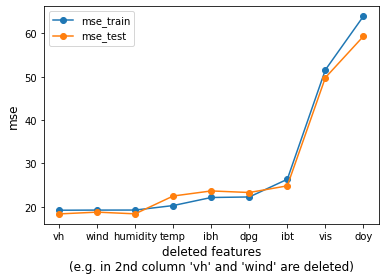

In [12]:
def mse_list(X, y, l_model):
    X3 = X.copy()
    mse_train = []
    mse_test = []
    for _ in range(9):
        # overfitting --> test_size=0.05 
        X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.05, random_state=2)
        model3 = l_model.fit(X3_train, y3_train)

        mse_train.append(metrics.mean_squared_error(y3_train, model3.predict(X3_train)))
        mse_test.append(metrics.mean_squared_error(y3_test, model3.predict(X3_test)))

        del X3[X3.columns[0]]
    return mse_train, mse_test

X = Ozone_dataset[['vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy']]
y = Ozone_dataset['ozone']
mse_train, mse_test = mse_list(X,y, linear_model.LinearRegression())

plt.plot(X.columns.tolist(), mse_train, 'o-', label='mse_train')
plt.plot(X.columns.tolist(), mse_test, 'o-', label='mse_test')
plt.xlabel("deleted features\n(e.g. in 2nd column 'vh' and 'wind' are deleted)", fontsize=12)
plt.ylabel('mse', fontsize=12)
plt.legend()
plt.show()

### Part D

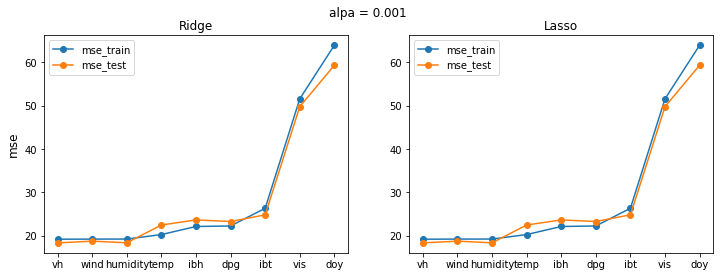

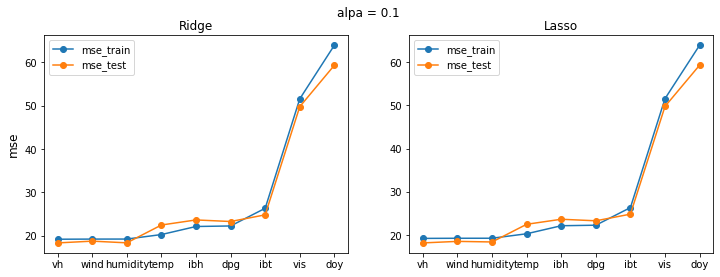

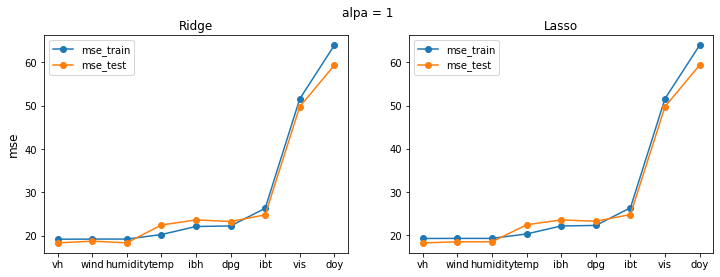

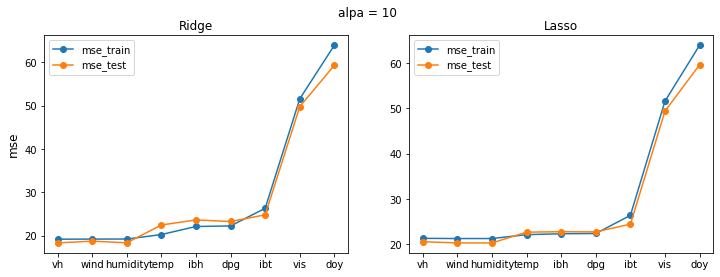

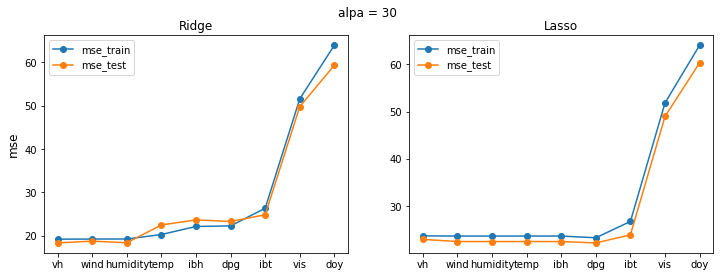

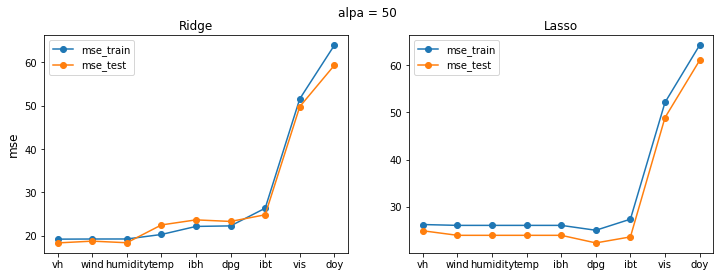

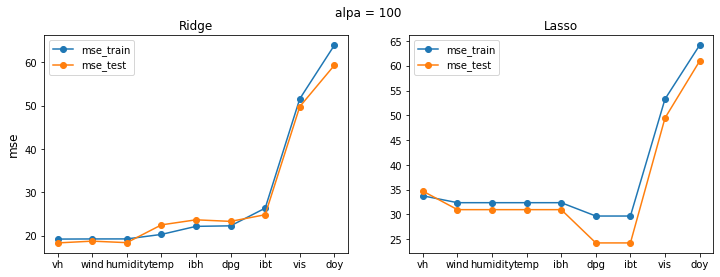

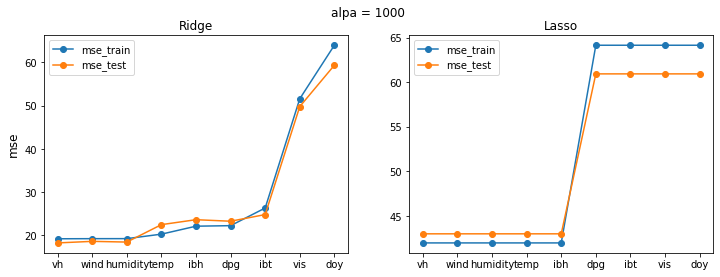

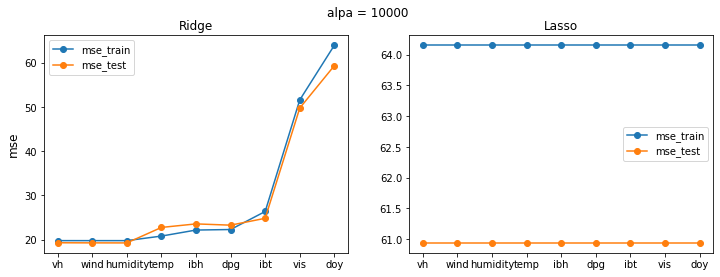

In [13]:
for a in [0.001, 0.1, 1, 10, 30, 50, 100, 1000, 10000]:
    ridge_mse_train, ridge_mse_test = mse_list(X,y, linear_model.Ridge(alpha=a))
    lasso_mse_train, lasso_mse_test = mse_list(X,y, linear_model.Lasso(alpha=a))

    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle(f'alpa = {a}', fontsize=12)
    axes[0].set_title('Ridge')
    axes[0].plot(X.columns.tolist(), ridge_mse_train, 'o-', label='mse_train')
    axes[0].plot(X.columns.tolist(), ridge_mse_test, 'o-', label='mse_test')
    axes[0].set_ylabel('mse', fontsize=12)
    axes[0].legend()

    axes[1].set_title('Lasso')
    axes[1].plot(X.columns.tolist(), lasso_mse_train, 'o-', label='mse_train')
    axes[1].plot(X.columns.tolist(), lasso_mse_test, 'o-', label='mse_test')
    axes[1].legend()
    plt.show()
